<a href="https://colab.research.google.com/github/lokajmato/Tensorflow_course_2022_mrdbourke/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-17 12:42:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   217MB/s    in 0.5s    

2022-02-17 12:42:03 (217 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import matplotlib.pyplot as plt
import os 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"trhere are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.") 

trhere are 2 directories and 0 images in pizza_steak.
trhere are 2 directories and 0 images in pizza_steak/test.
trhere are 0 directories and 250 images in pizza_steak/test/steak.
trhere are 0 directories and 250 images in pizza_steak/test/pizza.
trhere are 2 directories and 0 images in pizza_steak/train.
trhere are 0 directories and 750 images in pizza_steak/train/steak.
trhere are 0 directories and 750 images in pizza_steak/train/pizza.


In [ ]:
num_steak_img_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_img_train

750

In [ ]:
import pathlib
import numpy as np 

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def show_rand_img(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  
  rand_img = random.sample(os.listdir(target_folder), 1) 
  img = mpimg.imread(target_folder+"/"+rand_img[0])
  plt.imshow(img)
  plt.title(target_class+ " / " + rand_img[0])
  plt.axis(False);
  print(f"Shape img: {img.shape}")
  return img
  

Shape img: (512, 512, 3)


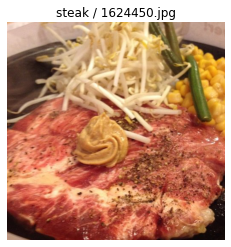

In [ ]:
img = show_rand_img("pizza_steak/train", "steak")

In [ ]:
from tensorflow.python.ops.gen_data_flow_ops import resource_accumulator_take_gradient_eager_fallback
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

model1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss="binary_crossentropy",
               metrics=["accuracy"])

#history1 = model1.fit(train_data,
  #                  epochs=5,
  #                    steps_per_epoch=len(train_data),
   #                   validation_data=valid_data,
    #                  validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                              tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

model2.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.7112 - accuracy: 0.5133 - val_loss: 0.7037 - val_accuracy: 0.4980
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.4980
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.4980
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.4980
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.4980


In [ ]:
model3 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

model3.fit(train_data,
           epochs=10,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))



Epoch 1/10
47/47 [==============================] - 9s 185ms/step - loss: 5.0024 - accuracy: 0.5973 - val_loss: 1.3890 - val_accuracy: 0.7080
Epoch 2/10
47/47 [==============================] - 8s 181ms/step - loss: 1.4291 - accuracy: 0.6953 - val_loss: 0.6494 - val_accuracy: 0.7320
Epoch 3/10
47/47 [==============================] - 9s 186ms/step - loss: 0.8154 - accuracy: 0.6987 - val_loss: 0.4474 - val_accuracy: 0.7900
Epoch 4/10
47/47 [==============================] - 9s 184ms/step - loss: 0.5221 - accuracy: 0.7713 - val_loss: 0.4293 - val_accuracy: 0.7880
Epoch 5/10
47/47 [==============================] - 8s 181ms/step - loss: 0.4652 - accuracy: 0.7880 - val_loss: 0.5451 - val_accuracy: 0.7460
Epoch 6/10
47/47 [==============================] - 9s 182ms/step - loss: 0.5444 - accuracy: 0.7673 - val_loss: 0.4261 - val_accuracy: 0.7920
Epoch 7/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3849 - accuracy: 0.8327 - val_loss: 0.4165 - val_accuracy: 0.7980
Epoch 

Shape img: (512, 512, 3)
Shape img: (384, 512, 3)


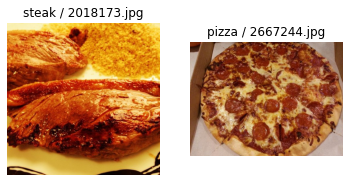

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
show_rand_img("pizza_steak/train", "steak");
plt.subplot(1, 2, 2)
show_rand_img("pizza_steak/train", "pizza");

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "pizza_steak/test"
train_dir = "pizza_steak/train"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
images_valid, labels_valid = train_data.next()
len(labels)

32

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

model4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         input_shape=(224, 224, 3),
         activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")])

model4.compile(optimizer=Adam(),
               loss="binary_crossentropy",
               metrics=["accuracy"])
"""
hist4 = model4.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

                   """

'\nhist4 = model4.fit(train_data,\n                   epochs=5,\n                   steps_per_epoch=len(train_data),\n                   validation_data=test_data,\n                   validation_steps=len(test_data))\n\n                   '

In [ ]:
model4.evaluate(test_data)

16/16 [==============================] - 3s 156ms/step - loss: 0.5827 - accuracy: 0.7540


[0.5826758742332458, 0.7540000081062317]

In [ ]:
import pandas as pd

def plot_loss_vall(history):

  range1 = range(len(history.history["loss"])) 

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(range1, history.history["loss"], label="loss")
  plt.plot(range1, history.history["val_loss"], label="val_loss")
  plt.title("Loss")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(range1, history.history["accuracy"], label="accuracy")
  plt.plot(range1, history.history["val_accuracy"], label="val_accuracy")
  plt.title("Accuracy")
  plt.legend()



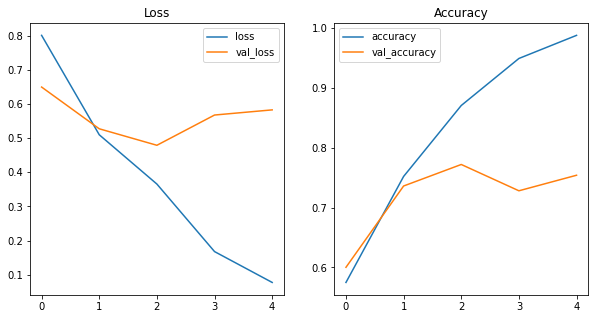

In [ ]:
plot_loss_vall(hist4)

In [ ]:
model5 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model5.compile(optimizer=Adam(),
               loss="binary_crossentropy",
               metrics="accuracy")

hist5 = model5.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 231ms/step - loss: 0.5908 - accuracy: 0.6947 - val_loss: 0.4381 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4692 - accuracy: 0.7940 - val_loss: 0.4380 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4356 - accuracy: 0.8053 - val_loss: 0.4241 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4117 - accuracy: 0.8240 - val_loss: 0.3850 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3863 - accuracy: 0.8320 - val_loss: 0.3878 - val_accuracy: 0.8420


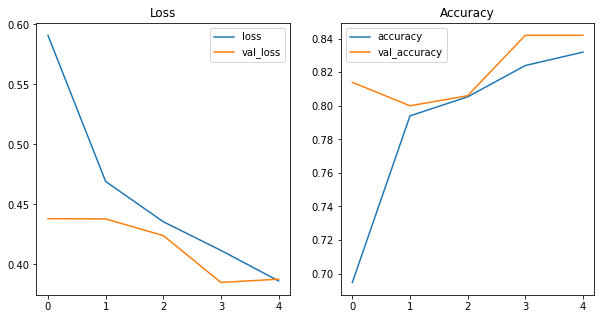

In [ ]:
plot_loss_vall(hist5)

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                                       target_size=(224, 224),
                                                       class_mode="binary",
                                                       shuffle=True)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


32

Text(0.5, 1.0, 'Orazok: 1.0')

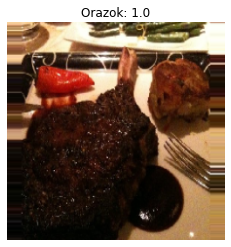

In [ ]:
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next()
randP = random.randint(0, len(images)-1)
plt.imshow(aug_images[randP])
plt.axis(False)
plt.title(f"Orazok: {aug_labels[randP]}") 

In [ ]:
model6 = Sequential([
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1, activation="sigmoid")])

model6.compile(optimizer=Adam(),
               loss="binary_crossentropy",
               metrics=["accuracy"])

hist6 = model6.fit(train_data_aug,
           epochs=5,
           steps_per_epoch=len(train_data_aug),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.6285 - accuracy: 0.6600 - val_loss: 0.4781 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.4886 - accuracy: 0.7807 - val_loss: 0.4251 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.4605 - accuracy: 0.7907 - val_loss: 0.4193 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.4509 - accuracy: 0.7953 - val_loss: 0.4163 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4473 - accuracy: 0.8020 - val_loss: 0.5152 - val_accuracy: 0.7720


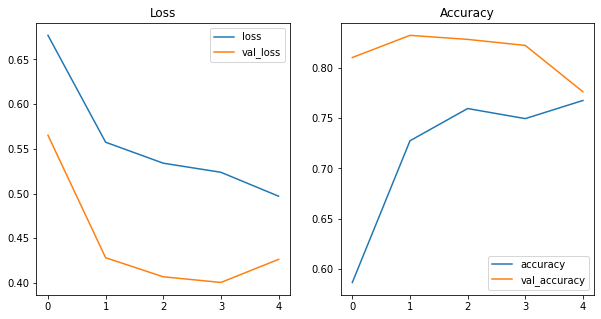

In [ ]:
plot_loss_vall(hist6)

In [ ]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-02-17 08:57:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-02-17 08:57:52 (33.9 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(4032, 3024, 3)

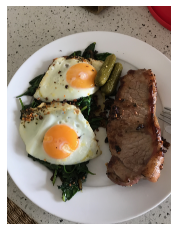

In [ ]:
image1 = mpimg.imread("03-steak.jpeg")
plt.imshow(image1)
plt.axis(False)
image1.shape

(-0.5, 3023.5, 4031.5, -0.5)

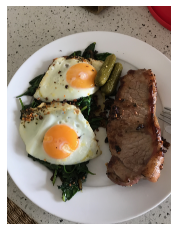

In [ ]:
image12 = image1.reshape(1, 4032, 3024, 3)
image12.shape
plt.imshow(image12[0])
plt.axis(False)

In [ ]:
image11 = tf.reshape(image1, (1, 4032, 3024, 3))
image11.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
def load_and_prep_image(image, shape):
  img = tf.io.read_file(image)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=(shape, shape))
  img = img/255.
  return img

(TensorShape([1, 224, 224, 3]),
 <tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.6377451 , 0.6220588 , 0.57892156],
          [0.6504902 , 0.63186276, 0.5897059 ],
          [0.63186276, 0.60833335, 0.5612745 ],
          ...,
          [0.52156866, 0.05098039, 0.09019608],
          [0.49509802, 0.04215686, 0.07058824],
          [0.52843136, 0.07745098, 0.10490196]],
 
         [[0.6617647 , 0.6460784 , 0.6107843 ],
          [0.6387255 , 0.6230392 , 0.57598037],
          [0.65588236, 0.63235295, 0.5852941 ],
          ...,
          [0.5352941 , 0.06862745, 0.09215686],
          [0.529902  , 0.05931373, 0.09460784],
          [0.5142157 , 0.05539216, 0.08676471]],
 
         [[0.6519608 , 0.6362745 , 0.5892157 ],
          [0.6392157 , 0.6137255 , 0.56764704],
          [0.65637255, 0.6269608 , 0.5828431 ],
          ...,
          [0.53137255, 0.06470589, 0.08039216],
          [0.527451  , 0.06862745, 0.1       ],
          [0.52254903, 0.05196078, 0.08725

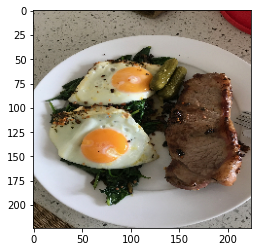

In [ ]:
image2 = load_and_prep_image("03-steak.jpeg", 224)
image2 = tf.reshape(image2, shape=(1, 224, 224, 3))
image2.shape, image2, plt.imshow(image2[0])

In [ ]:
model6.predict(image2)

array([[0.9636465]], dtype=float32)

In [ ]:
int(tf.round(model6.predict(image2)))

1

Predikovany obrazok je: steak


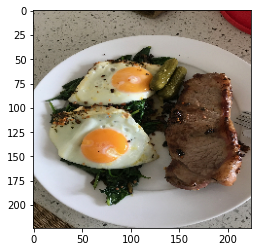

In [ ]:
labels1 = np.array(["pizza", "steak"]) 
print(f"Predikovany obrazok je: {labels1[int(model6.predict(image2).round())]}")
plt.imshow(image2[0])

In [ ]:
def predict_image(model, image, labels):
  """ Take an image from directory and print predicted type and show it"""

  
  image = load_and_prep_image(image, 224)
  image = tf.expand_dims(image, axis=0)
  pred1 = model.predict(image)
  pred = labels[int(pred1.round())]

  plt.imshow(image[0])
  plt.title(pred+": "+str(pred1))
  plt.axis(False)


In [ ]:
def predict_image_cat(model, image, labels):
  """ Take an image from directory and print predicted type and show it"""

  
  image = load_and_prep_image(image, 224)
  image = tf.expand_dims(image, axis=0)
  pred1 = model.predict(image)
  pred = labels[np.argmax(pred1)]

  plt.imshow(image[0])
  plt.title(pred+": "+str(pred1))
  plt.axis(False)

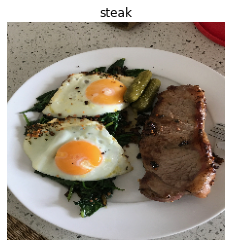

In [ ]:
predict_image(model6, "03-steak.jpeg", labels1)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-02-17 09:04:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-02-17 09:04:41 (42.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



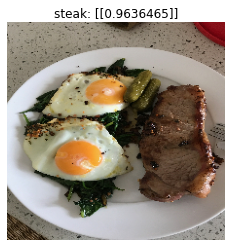

In [ ]:
predict_image(model6, "03-steak.jpeg", labels1)

In [ ]:
!wget https://media.istockphoto.com/photos/delicious-vegetarian-pizza-on-white-picture-id1192094401

--2022-02-17 09:16:59--  https://media.istockphoto.com/photos/delicious-vegetarian-pizza-on-white-picture-id1192094401
Resolving media.istockphoto.com (media.istockphoto.com)... 52.85.91.85, 52.85.91.120, 52.85.91.72, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|52.85.91.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107317 (105K) [image/jpeg]
Saving to: ‘delicious-vegetarian-pizza-on-white-picture-id1192094401’

delicious-vegetaria 100%[===================>] 104.80K  --.-KB/s    in 0.03s   

2022-02-17 09:16:59 (3.59 MB/s) - ‘delicious-vegetarian-pizza-on-white-picture-id1192094401’ saved [107317/107317]



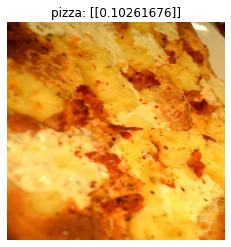

In [ ]:
predict_image(model6, "1220156.jpg", labels1)

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-02-17 12:42:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   210MB/s    in 2.4s    

2022-02-17 12:42:42 (210 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

In [ ]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

Shape img: (384, 512, 3)


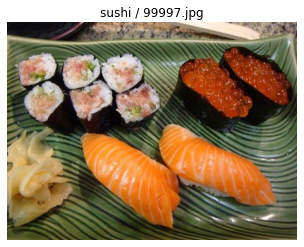

In [ ]:
image = show_rand_img("/content/10_food_classes_all_data/test", "sushi")

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Text(0.5, 1.0, 'chicken_curry')

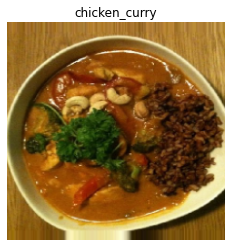

In [ ]:
#labels10 = np.array(["chicken_curry", "chicken_wings", "fried_rice", "grilled_salmon", "hamburger", "ice_cream", "pizza", "ramen", "steak", "sushi"])
n1, l1 = train_data.next()
rand = random.randint(0, len(n1)-1)
plt.imshow(n1[rand])
plt.axis(False)
plt.title(class_names[np.argmax(l1[rand])])

In [ ]:
model7 = Sequential([
                     Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10, activation="softmax")
])

model7.compile(optimizer=Adam(),
               loss="categorical_crossentropy",
               metrics=["accuracy"])

model7.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
hist7 = model7.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 523ms/step - loss: 2.1263 - accuracy: 0.2200 - val_loss: 1.9656 - val_accuracy: 0.3080
Epoch 2/5
235/235 [==============================] - 120s 512ms/step - loss: 1.9246 - accuracy: 0.3333 - val_loss: 1.8280 - val_accuracy: 0.3616
Epoch 3/5
235/235 [==============================] - 120s 510ms/step - loss: 1.8475 - accuracy: 0.3611 - val_loss: 1.8884 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 120s 511ms/step - loss: 1.7783 - accuracy: 0.3927 - val_loss: 1.8032 - val_accuracy: 0.3748
Epoch 5/5
235/235 [==============================] - 119s 508ms/step - loss: 1.7131 - accuracy: 0.4172 - val_loss: 1.7546 - val_accuracy: 0.3928


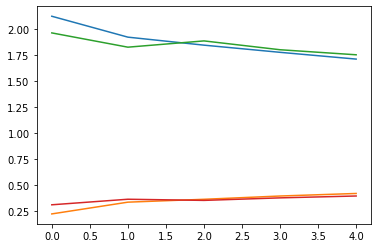

In [ ]:
plt.plot(pd.DataFrame(hist7.history))

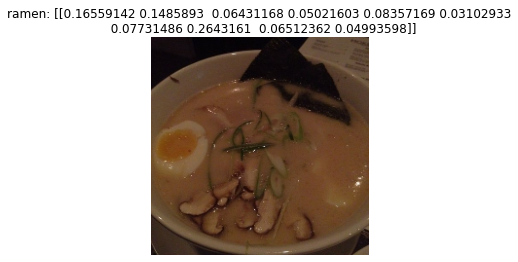

In [ ]:
predict_image_cat(model7, "/content/10_food_classes_all_data/test/ramen/1095815.jpg", class_names)

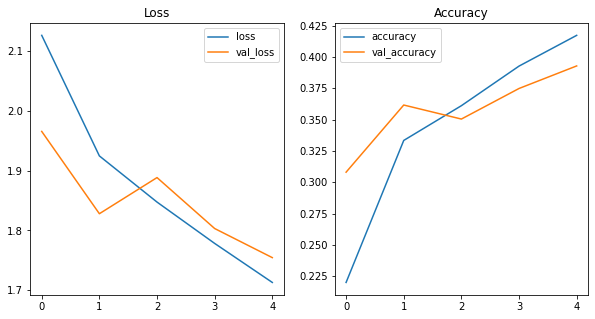

In [ ]:
plot_loss_vall(hist7)

In [ ]:
model7.save("model7_save")

INFO:tensorflow:Assets written to: model7_save/assets


In [ ]:
model8 = tf.keras.models.load_model("model7_save")

In [ ]:
model8.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 1.7546 - accuracy: 0.3928


[1.7545535564422607, 0.3928000032901764]